In [61]:
#importing essential libraries
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt


## Challenge:
Write a python program that does the following:
1. Reads the data from your local file directory

2. Adds a new column named [obsolete]. The column should flag TRUE, indicating an item is
expired and FALSE, otherwise
3. Transform the output data to a JSON format
4. Store the data in your local directory


# 1. Reads the data from your local file directory

In [62]:
#Reads the data from your local file directory
x = pd.read_csv("python hands-on - dataset.csv")
x

,date,sku,warehouse_location,quantity
0,2021-01-02,100940478,lagos,23
1,2020-11-09,100940479,lagos,84
2,2021-01-15,100940480,oyo,11
3,2016-11-09,100940481,ogun,98
4,2017-04-04,100940482,ogun,23
5,2018-01-13,100940483,abia,3
6,2021-03-15,100940484,kaduna,7
7,2021-01-11,100940485,abuja,4
8,2021-02-16,100940486,kano,9
9,2019-06-06,100940487,anambra,199


In [63]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                10 non-null     object
 1   sku                 10 non-null     int64 
 2   warehouse_location  10 non-null     object
 3   quantity            10 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [64]:
# converting the date object to datetime data type
x['date'] = pd.to_datetime(x['date'])
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                10 non-null     datetime64[ns]
 1   sku                 10 non-null     int64         
 2   warehouse_location  10 non-null     object        
 3   quantity            10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 448.0+ bytes


In [65]:
x

,date,sku,warehouse_location,quantity
0,2021-01-02,100940478,lagos,23
1,2020-11-09,100940479,lagos,84
2,2021-01-15,100940480,oyo,11
3,2016-11-09,100940481,ogun,98
4,2017-04-04,100940482,ogun,23
5,2018-01-13,100940483,abia,3
6,2021-03-15,100940484,kaduna,7
7,2021-01-11,100940485,abuja,4
8,2021-02-16,100940486,kano,9
9,2019-06-06,100940487,anambra,199


# 2. Adds a new column named [obsolete]. The column should flag TRUE, indicating an item is expired and FALSE, otherwise

In [66]:
# Adds a new column named [obsolete]. The column should flag TRUE, indicating an item is expired and FALSE, otherwise
x['obsolete'] = x['date'] < '2021-01-01'
x

,date,sku,warehouse_location,quantity,obsolete
0,2021-01-02,100940478,lagos,23,False
1,2020-11-09,100940479,lagos,84,True
2,2021-01-15,100940480,oyo,11,False
3,2016-11-09,100940481,ogun,98,True
4,2017-04-04,100940482,ogun,23,True
5,2018-01-13,100940483,abia,3,True
6,2021-03-15,100940484,kaduna,7,False
7,2021-01-11,100940485,abuja,4,False
8,2021-02-16,100940486,kano,9,False
9,2019-06-06,100940487,anambra,199,True


# 3. Transform the output data to a JSON format

In [67]:
# Transform the output data to a JSON format 
x_json = x.to_json()
x_json

'{"date":{"0":1609545600000,"1":1604880000000,"2":1610668800000,"3":1478649600000,"4":1491264000000,"5":1515801600000,"6":1615766400000,"7":1610323200000,"8":1613433600000,"9":1559779200000},"sku":{"0":100940478,"1":100940479,"2":100940480,"3":100940481,"4":100940482,"5":100940483,"6":100940484,"7":100940485,"8":100940486,"9":100940487},"warehouse_location":{"0":"lagos","1":"lagos","2":"oyo","3":"ogun","4":"ogun","5":"abia","6":"kaduna","7":"abuja","8":"kano","9":"anambra"},"quantity":{"0":23,"1":84,"2":11,"3":98,"4":23,"5":3,"6":7,"7":4,"8":9,"9":199},"obsolete":{"0":false,"1":true,"2":false,"3":true,"4":true,"5":true,"6":false,"7":false,"8":false,"9":true}}'

# 4. Store the data in your local directory (disk)

In [68]:
# Store the data in your local directory (disk)
import pickle
filename = 'python hands-on - dataset.json'
pickle.dump(x_json, open(filename,'wb'))

# some time later...
 
# load the file from disk

In [69]:
loaded_x_json = pickle.load(open('python hands-on - dataset.json', 'rb'))
print(loaded_x_json)

{"date":{"0":1609545600000,"1":1604880000000,"2":1610668800000,"3":1478649600000,"4":1491264000000,"5":1515801600000,"6":1615766400000,"7":1610323200000,"8":1613433600000,"9":1559779200000},"sku":{"0":100940478,"1":100940479,"2":100940480,"3":100940481,"4":100940482,"5":100940483,"6":100940484,"7":100940485,"8":100940486,"9":100940487},"warehouse_location":{"0":"lagos","1":"lagos","2":"oyo","3":"ogun","4":"ogun","5":"abia","6":"kaduna","7":"abuja","8":"kano","9":"anambra"},"quantity":{"0":23,"1":84,"2":11,"3":98,"4":23,"5":3,"6":7,"7":4,"8":9,"9":199},"obsolete":{"0":false,"1":true,"2":false,"3":true,"4":true,"5":true,"6":false,"7":false,"8":false,"9":true}}


# 5. Exploratory Data Analyst (EDA)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


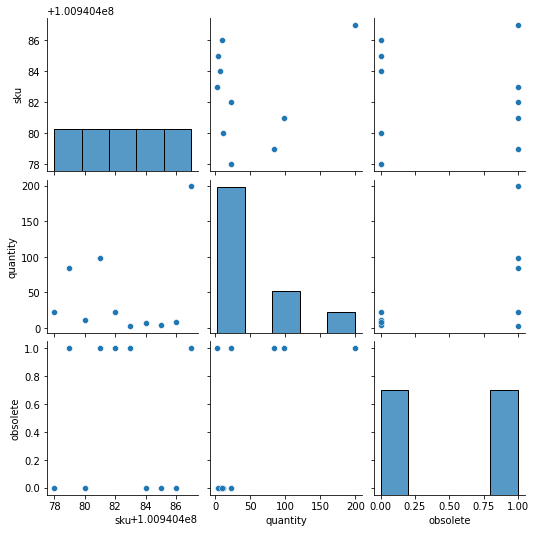

In [70]:
sns.pairplot(x)

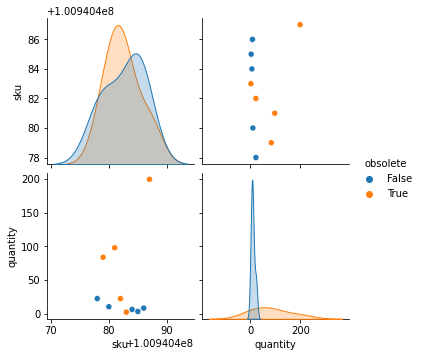

In [71]:
sns.pairplot(x, hue='obsolete')

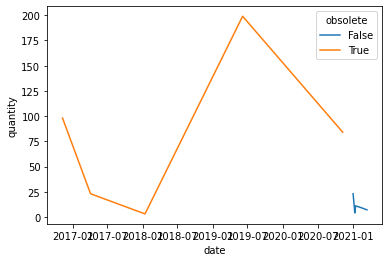

In [72]:
sns.lineplot(x="date", y="quantity",
             hue="obsolete",
             data=x)

###### The End  &copy; Bilau Adeniran